<a href="https://colab.research.google.com/github/JavierPerrote/DESARROLLO-DE-UN-SENSOR-SOFTWARE-PARA-LA-ESTIMACION-DE-MATERIA-SECA-EN-UN-PROCESO-INDUSTRIAL/blob/main/Histogramas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import math as math
import scipy.signal
import re
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [ ]:
dataFile = pd.read_csv('sensor.csv')

PRESIONES DEL VAPOR

<Figure size 2000x1500 with 0 Axes>

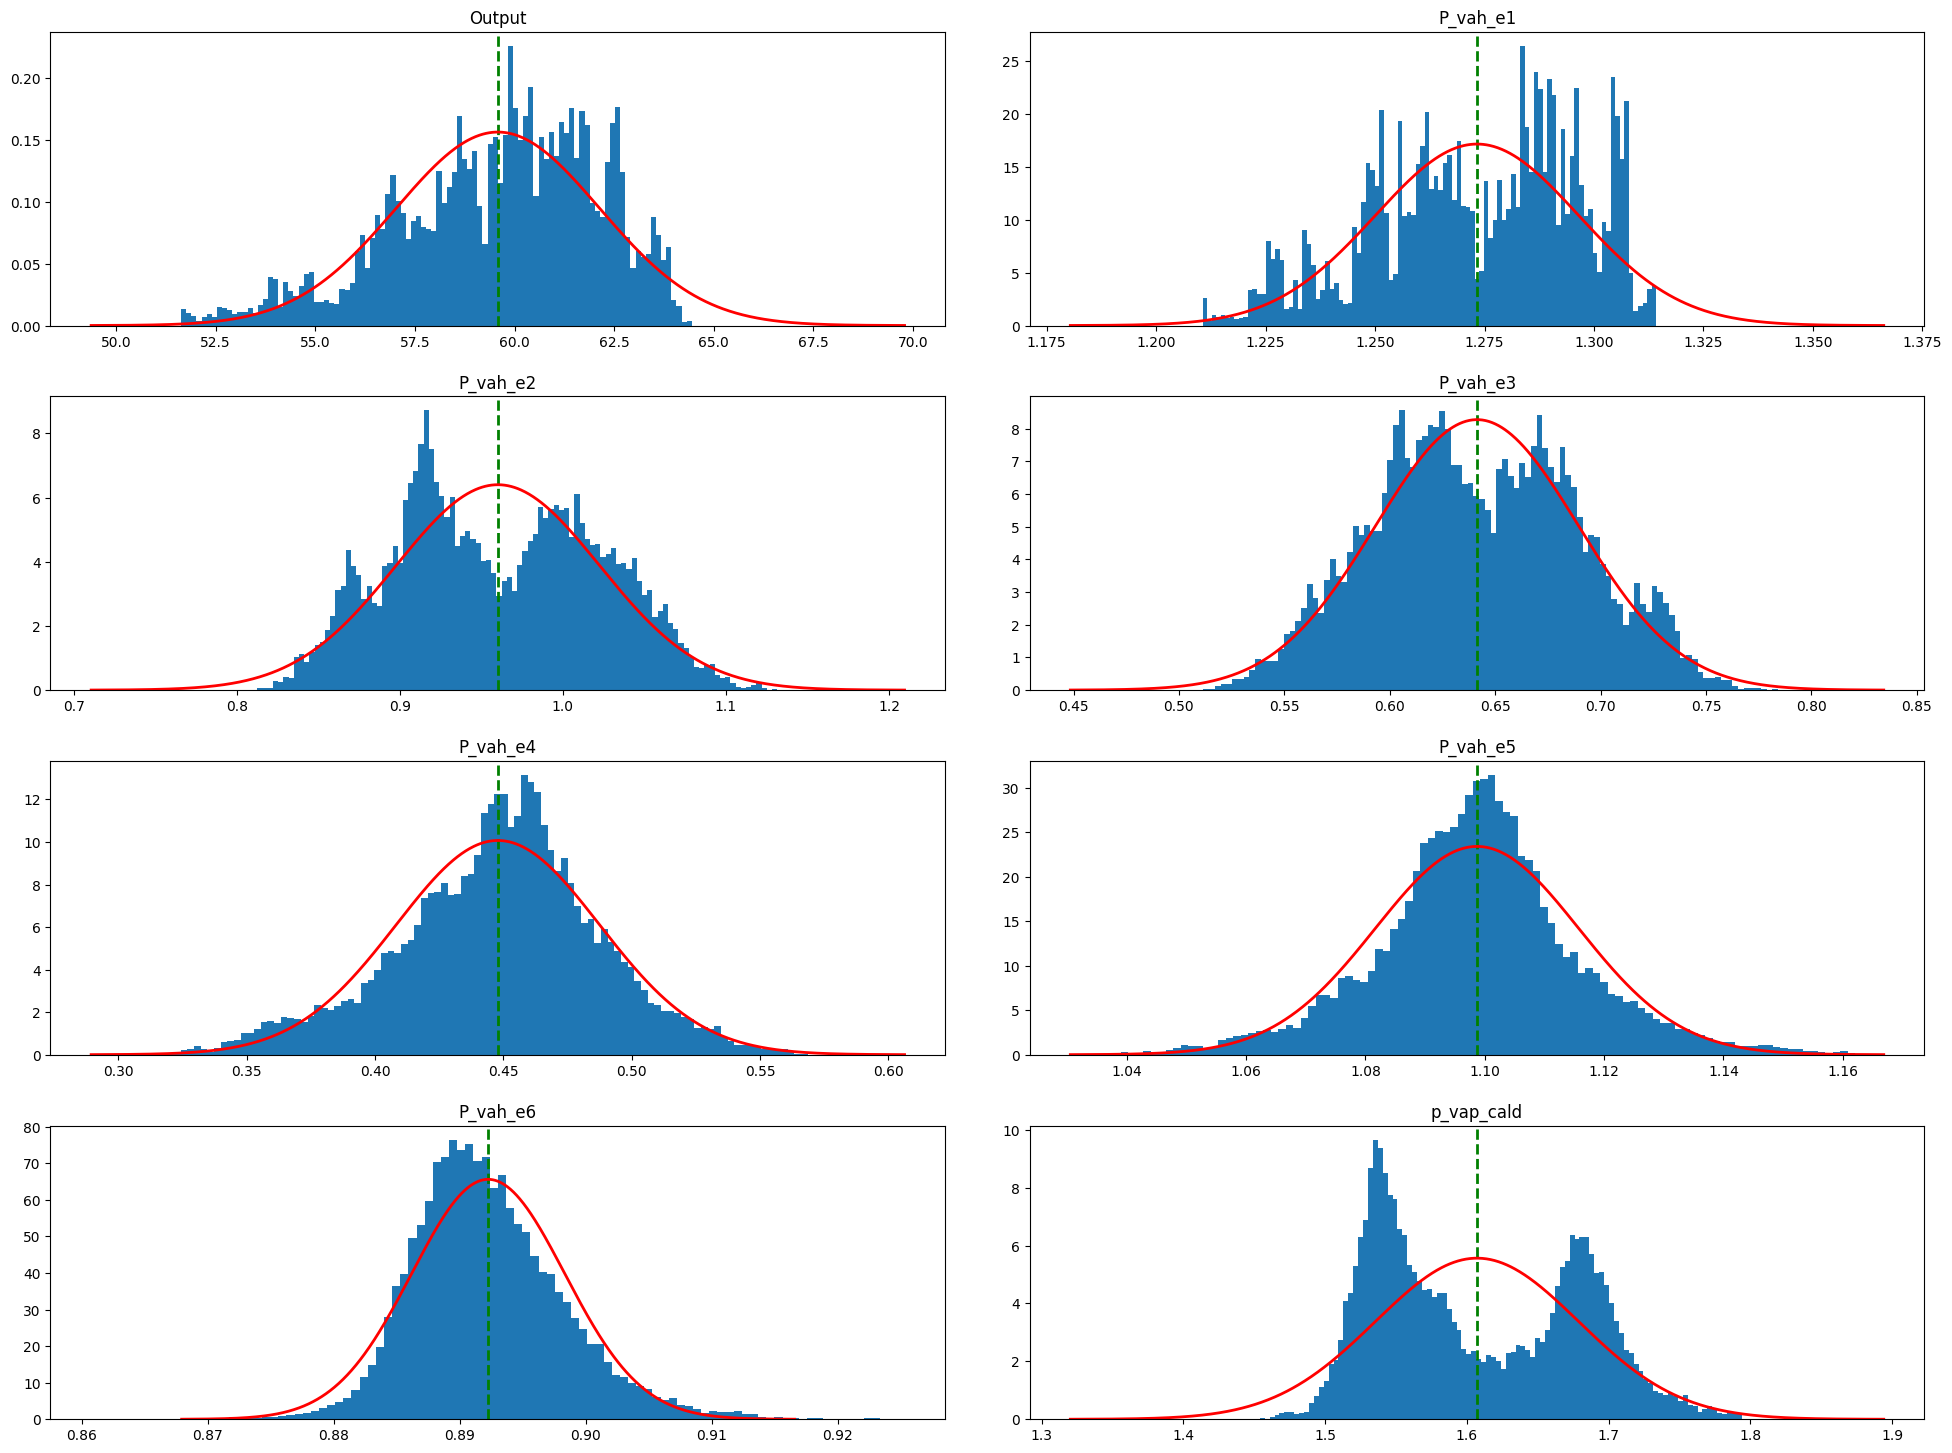

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos

data = dataFile.loc[:,['Output','P_vah_e1','P_vah_e2','P_vah_e3','P_vah_e4','P_vah_e5','P_vah_e6','p_vap_cald']]


# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma
    axs[index // ncolumnsG, index%ncolumnsG ].hist(data[column],bins=100, density=True)
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    axs[index // ncolumnsG, index%ncolumnsG ].axvline(x=mean, color='g', linestyle='dashed', linewidth=2)

    # Crear la curva de distribución normal
    x_axis = np.linspace(mean - 4 * std, mean + 4 * std, 1000)
    curve = norm.pdf(x_axis, mean, std)

    # Añadir la curva al histograma
    axs[index // ncolumnsG, index%ncolumnsG ].plot(x_axis, curve, 'r-', linewidth=2)

# Mostrar los histogramas
plt.show()

TEMPERATURAS DEL VAPOR

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos

data = dataFile.loc[:,['T_vah_e1', 'T_vah_e2', 'T_vah_e3',
       'T_vah_e4', 'T_vah_e5', 'T_vah_e6', 'T_vap_cald','T_ent_e1']]

# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma
    axs[index // ncolumnsG, index%ncolumnsG ].hist(data[column],bins=100, density=True)
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para la media

    axs[index // ncolumnsG, index%ncolumnsG ].axvline(x=mean, color='g', linestyle='dashed', linewidth=2)

    # Crear la curva de distribución normal
    x_axis = np.linspace(mean - 4 * std, mean + 4 * std, 1000)
    curve = norm.pdf(x_axis, mean, std)

    # Añadir la curva al histograma
    axs[index // ncolumnsG, index%ncolumnsG ].plot(x_axis, curve, 'r-', linewidth=2)

# Mostrar los histogramas
plt.show()



TEMPERATURAS DEL JUGO

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos

data =  dataFile.loc[:,['e1_T_jugo_salida',
'e2_T_jugo_salida', 'e3_T_jugo_salida', 'e4_T_jugo_salida',
'e5_T_jugo_salida', 'e6_T_jugo_salida']]


# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma
    axs[index // ncolumnsG, index%ncolumnsG ].hist(data[column],bins=100, density=True)
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media

    axs[index // ncolumnsG, index%ncolumnsG ].axvline(x=mean, color='g', linestyle='dashed', linewidth=2)

    # Crear la curva de distribución normal
    x_axis = np.linspace(mean - 4 * std, mean + 4 * std, 1000)
    curve = norm.pdf(x_axis, mean, std)

    # Añadir la curva al histograma
    axs[index // ncolumnsG, index%ncolumnsG ].plot(x_axis, curve, 'r-', linewidth=2)

# Mostrar los histogramas
plt.show()


TEMPERATURAS EN LOS CAMBIADORES

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos

data = dataFile.loc[:,['T_entrada_R10', 'T_entrada_R13',
       'T_entrada_R14', 'T_entrada_R3', 'T_entrada_R3B', 'T_entrada_R8',
       'T_entrada_R9', 'T_jugo_anteevap']]

# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma
    axs[index // ncolumnsG, index%ncolumnsG ].hist(data[column],bins=100, density=True)
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media

    axs[index // ncolumnsG, index%ncolumnsG ].axvline(x=mean, color='g', linestyle='dashed', linewidth=2)

    # Crear la curva de distribución normal
    x_axis = np.linspace(mean - 4 * std, mean + 4 * std, 1000)
    curve = norm.pdf(x_axis, mean, std)

    # Añadir la curva al histograma
    axs[index // ncolumnsG, index%ncolumnsG ].plot(x_axis, curve, 'r-', linewidth=2)

# Mostrar los histogramas
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos

data = dataFile.loc[:,[ 'T_salida_R10', 'T_salida_R11',
       'T_salida_R12', 'T_salida_R3', 'T_salida_R3A', 'T_salida_R3B']]
# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma
    axs[index // ncolumnsG, index%ncolumnsG ].hist(data[column],bins=100, density=True)
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media

    axs[index // ncolumnsG, index%ncolumnsG ].axvline(x=mean, color='g', linestyle='dashed', linewidth=2)

    # Crear la curva de distribución normal
    x_axis = np.linspace(mean - 4 * std, mean + 4 * std, 1000)
    curve = norm.pdf(x_axis, mean, std)

    # Añadir la curva al histograma
    axs[index // ncolumnsG, index%ncolumnsG ].plot(x_axis, curve, 'r-', linewidth=2)

# Mostrar los histogramas
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos

data = dataFile.loc[:,[
       'T_salida_R4', 'T_salida_R5', 'T_salida_R6', 'T_salida_R7',
       'T_salida_R8', 'T_salida_R9']]
# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma
    axs[index // ncolumnsG, index%ncolumnsG ].hist(data[column],bins=100, density=True)
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media

    axs[index // ncolumnsG, index%ncolumnsG ].axvline(x=mean, color='g', linestyle='dashed', linewidth=2)

    # Crear la curva de distribución normal
    x_axis = np.linspace(mean - 4 * std, mean + 4 * std, 1000)
    curve = norm.pdf(x_axis, mean, std)

    # Añadir la curva al histograma
    axs[index // ncolumnsG, index%ncolumnsG ].plot(x_axis, curve, 'r-', linewidth=2)

# Mostrar los histogramas
plt.show()

FLUJOS MASICOS

<Figure size 2000x1500 with 0 Axes>

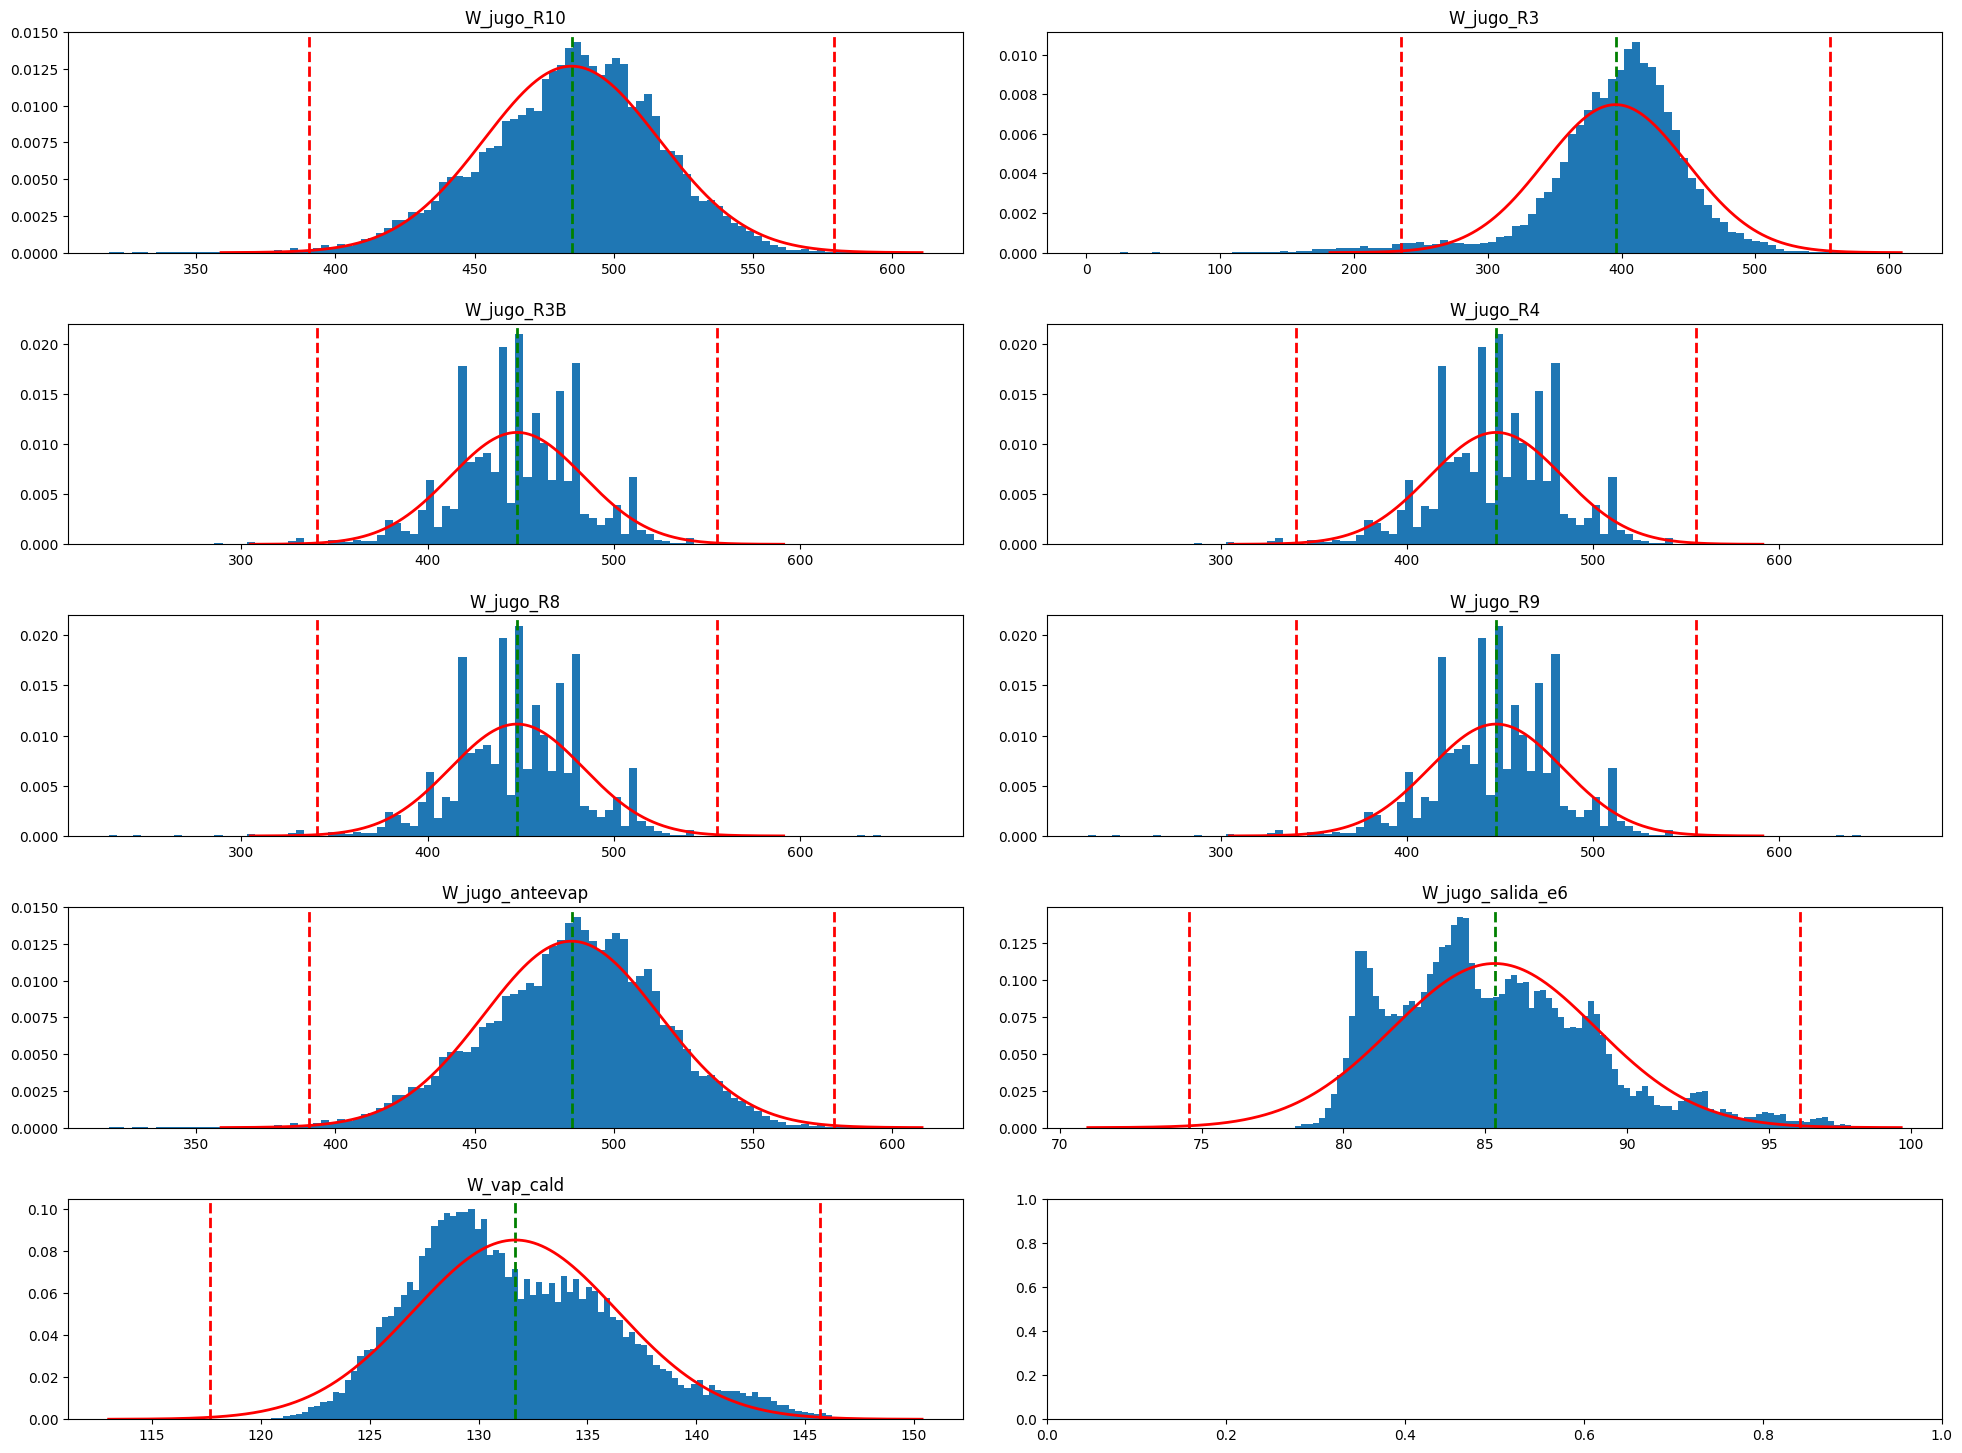

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos

data =  dataFile.loc[:,['W_jugo_R10',
       'W_jugo_R3', 'W_jugo_R3B', 'W_jugo_R4', 'W_jugo_R8', 'W_jugo_R9',
       'W_jugo_anteevap', 'W_jugo_salida_e6', 'W_vap_cald']]

# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [20, 15]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma
    axs[index // ncolumnsG, index%ncolumnsG ].hist(data[column],bins=100, density=True)
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media
    axs[index // ncolumnsG, index%ncolumnsG ].axvline(x=ucl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axvline(x=lcl, color='r', linestyle='dashed', linewidth=2)
    axs[index // ncolumnsG, index%ncolumnsG ].axvline(x=mean, color='g', linestyle='dashed', linewidth=2)

    # Crear la curva de distribución normal
    x_axis = np.linspace(mean - 4 * std, mean + 4 * std, 1000)
    curve = norm.pdf(x_axis, mean, std)

    # Añadir la curva al histograma
    axs[index // ncolumnsG, index%ncolumnsG ].plot(x_axis, curve, 'r-', linewidth=2)

# Mostrar los histogramas
plt.show()

HISTOGRAMAS RESUMEN

<Figure size 1000x500 with 0 Axes>

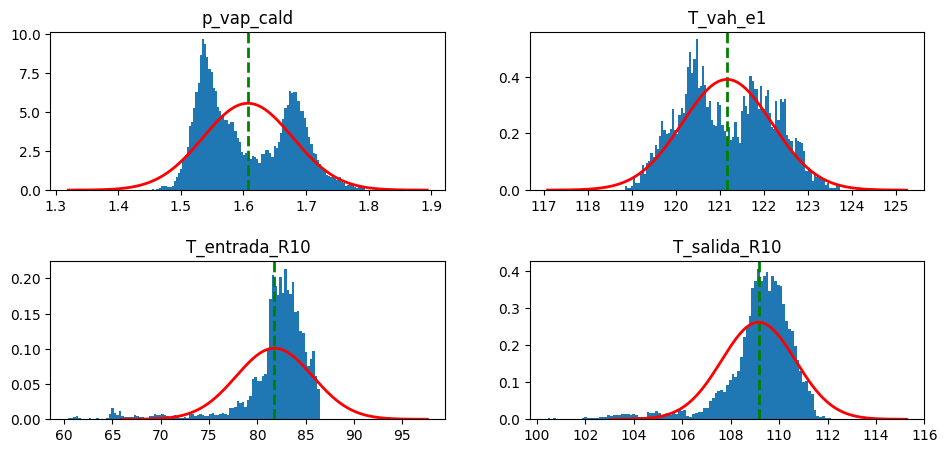

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import norm

# Cargar los datos
data =  dataFile.loc[:,['p_vap_cald','T_vah_e1','T_entrada_R10','T_salida_R10']]

# Configurar la figura
nRowsG = math.ceil(len(data.columns) /2)
ncolumnsG = 2
plt.rcParams['figure.figsize'] = [10, 5]
plt.figure()
fig, axs = plt.subplots(nRowsG, ncolumnsG)
fig.tight_layout(pad=3.0)

# Crear histogramas y añadir líneas verticales y curvas
for index,column in enumerate(data.columns):
    # Calcular los extremos y la media
    mean = np.mean(data[column])
    std = np.std(data[column])
    ucl = mean + 3 * std
    lcl = mean - 3 * std

    # Crear histograma
    axs[index // ncolumnsG, index%ncolumnsG ].hist(data[column],bins=100, density=True)
    axs[index // ncolumnsG, index%ncolumnsG ].set_title(column)

    # Añadir líneas verticales para los extremos y la media

    axs[index // ncolumnsG, index%ncolumnsG ].axvline(x=mean, color='g', linestyle='dashed', linewidth=2)

    # Crear la curva de distribución normal
    x_axis = np.linspace(mean - 4 * std, mean + 4 * std, 1000)
    curve = norm.pdf(x_axis, mean, std)

    # Añadir la curva al histograma
    axs[index // ncolumnsG, index%ncolumnsG ].plot(x_axis, curve, 'r-', linewidth=2)

# Mostrar los histogramas
plt.show()